In [5]:
#import packages needed for entire file
import tweepy
import GetOldTweets3 as got
import csv
import pandas as pd
import random 
import numpy
import json

# Set Twitter authentication
from twitter_authentication import CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify=True)

# Spreading a virus: Incubating the 'Plandemic' conspiracy theory

## Introduction

### Plandemic

   On May 4, 2020, more than five months after the first confirmed case of the 2019 Novel Coronavirus, a 26-minute documentary titled “Plandemic” was released online (Frenkel & Alba, 2020). The video presented an interview with discredited scientist, Dr. Judy Mikovits, in which she explains that health organizations, “big pharma,” and the government are all bad actors behind the global coronavirus pandemic. She explains why she was removed from her scientific positions by claiming she was wrongly blamed for stealing lab information and accuses Dr. Anthony Fauci of being responsible for the deaths of millions of HIV/AIDs patients (Enserink & Cohen, 2020). Then she proposes a conspiracy theory about COVID-19, which includes claims that the virus was manipulated and created by doctors in a North Carolina lab, flu vaccines increase the odds of getting COVID-19 by 36%, and wearing a mask activates the virus and makes the individual more vulnerable to contract the virus (Funke, 2020).

   “Plandemic” was viewed more than eight million times in the first week of its online presence. However, its availability was short-lived. YouTube and Facebook soon began taking down the videos due to its misinformation about Coronavirus (Frenkel & Alba, 2020). Despite the effort maintained by the social media sites, individuals continued to upload new videos, share the information, and perpetuate the conspiracy theories in “Plandemic.”
    
   On the same day as the release of "Plandemic", the global death count from COVID-19 was approaching 250,000. Six weeks later the global death count was greater than 408,000. The spread of misinformation about a virus that was/is still in the peak of its destruction is harmful to populations. The spread of misinformation has the potential to lead people to make decisions that are destructive to their health and the health of their communities. This study seeks to use cultivation theory to understand how an individual’s Twitter friends might have affected their decision to share the documentary and documents the networks of the individuals who chose to spread the conspiracy theory. 

### Cultivation Theory

   Gerbner and Gross (1976) introduced cultivation theory to explain why individuals who are exposed to certain attitudes and behaviors on television, become normalized to those behaviors in their real life. Four decades later, cultivation theory is still highly utilized in communication research (Bryant & Miron, 2004) since individuals continue to absorb media through watching television, online videos, and social media. However, cultivation theory has not made strides in the social media sphere. There is potential that the media a person absorbs through social media assists in the creation of attitudes and beliefs about the world. This study will examine the social relationships (followers and friends), of the individuals who shared the “Plandemic” documentary. This research provides insight into how Twitter friends influence attitudes and behaviors about COVID-19 and the "Plandemic" documentary.
   
 ### Research Questions
 
   The research done in this study is guided by cultivation theory and two research questions:
   - RQ1: Which Twitter accounts are most followed by Plandemic tweeters?
   - RQ2: What is the breadth of accounts that Plandemic tweeters follow?
   

## Methods

   This study identifies the friends (accounts followed by Twitter users) of two groups; 1. the experimental, "Plandemic" tweeters group and 2. the control, Netflix "Explained" group. Netflix "Explained" is a documentary series produced by Netflix that provides information about several different topics. This was selected as the control because it has a similar educational tone to "Plandemic" and presents information in a similar video format. 
   
   To conduct this study, Python 3.0 was utilized to gather, analyze, and visualize all data. First, I gathered tweets. Then, I collected the usernames of the users who published the tweets. Next, I selected a random sample (n=100) from whom to get friends lists. Then, I counted the number of occurances for each friend and sorted the list to show who was the most followed by each group. Finally, I manually searched for the top 30 friends and coded each type of account into categories.
   
   The details of each step is outlined below:
   
   I used the Python package "GetOldTweets3" to collect tweets based on a set search criteria. For the "Plandemic" tweets, the search criteria was as follows: contains "plandemic AND youtu.be OR bitchute OR Vimeo", shared between May 5, 2020, and May 9, 2020, with a maximum collection count of 10,000. This search criteria was set to include all tweets that shared the actual link to the video. 

In [ ]:
# !! CAUTION !! This cell collects a large amount of data and takes a long time to run

# Set search criteria
tweetCriteria  = got.manager.TweetCriteria().setQuerySearch('plandemic AND youtu.be OR bitchute OR Vimeo').setSince('2020-05-04').setUntil('2020-05-09').setMaxTweets(10000)

# Get tweets from the search
tweets = got.manager.TweetManager.getTweets(tweetCriteria)
print('Tweets collected!')

After the tweets were collected, I wrote the collected tweets to a .csv file to store the data. The tweets were filtered to exclude fact checks to avoid including any videos that may have been a link to a fact check video about Plandemic. The file stores the tweet text, username, date, retweet count, and favorite counts.

In [ ]:
# !! CAUTION !! This cell overwrites a file 

# Counter for progress
counter = 0

for tweet in tweets:
    counter += 1
    if counter % 1000 == 0:
        print('%d tweets written' % counter) # Prints statement when 1,000 tweets are printed
        
    # Filter tweets    
    if ('fact-checks' not in tweet.text) and ('fact checks' not in tweet.text) and ('fact check' not in tweet.text) and ('fact-check' not in tweet.text):
          
        # Write csv file
        with open('tweets_plandemic.csv', 'w', encoding = 'utf-8') as fn:                    
            f = csv.writer(fn)
            f.writerow(['tweet_text',
                        'username',
                        'date',
                        'retweets',
                        'favorites'
                       ])
            for tweet in tweets:
                f.writerow([tweet.text, 
                            tweet.username,
                            tweet.date,
                            tweet.retweets,
                            tweet.favorites
                                 ])

   For the "Explained" tweets, the search criteria was as follows: contains "Netflix Explained OR netflixexplained", shared between January 1, 2020, and May 30, 2020, with a maximum collection count of 10,000. The date range was expanded for the "Explained" tweets because there were fewer tweets and the larger range allowed for a collection of 10,000 tweets. 

In [ ]:
# !! CAUTION !! This cell collects a large amount of data and takes a long time to run

# Set search criteria
tweetCriteria_netflix  = got.manager.TweetCriteria().setQuerySearch('Netflix Explained OR Netflixexplained ').setSince('2020-01-01').setUntil('2020-05-30').setMaxTweets(10000)

# Get tweets from the search
tweets = got.manager.TweetManager.getTweets(tweetCriteria_netflix)
print('Tweets collected!')

The "Explained" tweets text, usernames, dates, retweet and favorite counts were stored in a seperate .csv file.

In [ ]:
# !! CAUTION !! This cell overwrites a file 
# Counter for Progress
counter = 0

for tweet in tweets:
    counter += 1
    if counter % 1000 == 0:
        print('%d tweets written' % counter) # Prints statement when 1,000 tweets are printed

    # Write csv file
    with open('tweets_explained.csv', 'w', encoding = 'utf-8') as fn:                    
        f = csv.writer(fn)
        f.writerow(['tweet_text',
                    'username',
                    'date',
                    'retweets',
                    'favorites'
                   ])
        for tweet in tweets:
            f.writerow([tweet.text, 
                        tweet.username,
                        tweet.date,
                        tweet.retweets,
                        tweet.favorites
                             ])

From each of the files, I collected the usernames from each of the tweeters. 

In [3]:
df_tweets_pl = pd.read_csv('tweets_plandemic.csv')

#Obtain unique instances of usernames
pl_username_list = df_tweets_pl.username.unique()

df_tweets_ex = pd.read_csv('tweets_explained.csv')

#Obtain unique instances of usernames
ex_username_list = df_tweets_ex.username.unique()

From each list of usernames, I selected a random sample of 100 usernames.

In [ ]:
# !! CAUTION !! This cell resets the random usernames used for data collection

# Set sample size; for time purposes, limited to 100 here
sample_size = 100

pl_random_sample_usernames = np.random.choice(pl_username_list, sample_size)
ex_random_sample_usernames = np.random.choice(ex_username_list, sample_size) 

Then, I gathered the complete friends list of each of the 100 usernames (if available) and stored in seperate .json files. This process takes 100 minutes due to Twitter's rate limit. 

In [ ]:
# !! CAUTION !! This cell collects a large amount of data and takes a long time to run

# Create dictionary of usernames
pl_friends_list = {}

# Collect the friend ids of each username
for username in pl_random_sample_usernames: 
    try:
        pl_friends = []
        for page in tweepy.Cursor(api.friends_ids, username).pages():
            pl_friends.extend(page)
            if len(page) == 5000: 
                time.sleep(2)  # if len(page) > 5000 a new page is loaded, sleep to avoid Twitter API rate limit
        
        pl_friends_list[username] = pl_friends
        
        # Show progress of the pass by printing the number collected and length of friends list
        print(len(pl_friends_list.keys()), len(pl_friends))
    except:
        pass
    
# Write results to a .json file    
with open('sample-plandemic-tweeters-friends.json', 'w') as f:
    json.dump(pl_friends_list,f)

In [ ]:
# !! CAUTION !! This cell collects a large amount of data and takes a long time to run

# Create dictionary of usernames
ex_friends_list = {}

# Collect the friend ids of each username
for username in ex_random_sample_usernames: 
    try:
        ex_friends = []
        for page in tweepy.Cursor(api.friends_ids, username).pages():
            ex_friends.extend(page)
            if len(page) == 5000: 
                time.sleep(2)  # if len(page) > 5000 a new page is loaded, sleep to avoid Twitter API rate limit
        
        ex_friends_list[username] = ex_friends
        
        # Show progress of the pass by printing the number collected and length of friends list
        print(len(ex_friends_list.keys()), len(ex_friends))
    except:
        pass
    
# Write results to a .json file    
with open('sample-explained-tweeters-friends.json', 'w') as f:
    json.dump(ex_friends_list,f)


With this code, I was able to collect the friends lists of 94 "Plandemic" tweeters and 98 "Explained" tweeters. For the purposes of this project, I've decided to keep the sample at 100, but if I were to publish this report, I believe the sample size should be closer to 350. 

In [112]:
with open('sample-plandemic-tweeters-friends.json') as json_file:
    plandemic_friends = json.load(json_file)
    
with open('sample-explained-tweeters-friends.json') as json_file:
    explained_friends = json.load(json_file)

In [113]:
pl_sample_size = len(plandemic_friends)
ex_sample_size = len(explained_friends)
print(pl_sample_size, ex_sample_size)

94 98


After collecting the friends lists of the "Plandemic" and "Explained" tweeters, I created a flat list of the friends and used Counter from the Python package Collections to identify the top 30 friends who were most followed by both of the groups. 

In [139]:
# Set values to be equal to variable
a=plandemic_friends.values()
b=explained_friends.values()

# Create an empty list 
pl_flat_list_friends = []
ex_flat_list_friends = []

# Add each value into respective list
for element in a:
    for item in element:
        pl_flat_list_friends.append(item)
        
for element in b:
    for item in element:
        ex_flat_list_friends.append(item)

For sake of time, I only retrieved the usernames of the top 30 friends for each group. 

In [140]:
from collections import Counter

# Count occurances of friends
pl_counted_friends = Counter(pl_flat_list_friends)

# Put the top 30 friends in a list 
pl_top_30_friends = pl_counted_friends.most_common(30)

In [141]:
# Create an empty dictionary for the top 30 friends 
pl_top_30_friends_usernames = []

# Identify the first element of the Counter tuple
pl_top_30_friends_ids = [i[0] for i in pl_top_30_friends]

#Retrieve the username of each friend 
for user_id in pl_top_30_friends_ids:
    u = api.get_user(user_id)
    pl_top_30_friends_usernames.append(u.screen_name)
    
# Write the results to a csv
with open('stats-plandemic-tweeters.csv', 'w', encoding = 'utf-8') as fn:
    f = csv.writer(fn)
    f.writerow(['friend',
                'count',                
                ])
    for key, count in pl_counted_friends.items():
        friend = key
        f.writerow([friend, count])

This process was repeated for the "Explained" group.

In [142]:
# Count occurances of friends
ex_counted_friends = Counter(ex_flat_list_friends)

# Put the top 30 friends in a list 
ex_top_30_friends = ex_counted_friends.most_common(30)

In [143]:
# Create an empty dictionary for the top 30 friends 
ex_top_30_friends_usernames = []

# Identify the first element of the Counter tuple
ex_top_30_friends_ids = [i[0] for i in ex_top_30_friends]

# Loop over each user id in the top 30 friends and retrieve the corresponding username
for user_id in ex_top_30_friends_ids:
    x = api.get_user(user_id)
    ex_top_30_friends_usernames.append(x.screen_name)

# Write the results to a csv
with open('stats-explained-tweeters.csv', 'w', encoding = 'utf-8') as fn:
    f = csv.writer(fn)
    f.writerow(['friend',
                'count',
               ])
    for key, count in ex_counted_friends.items():
        friend = key
        f.writerow([friend, 
                    count,
                    ])

The list of friend ids and corresponding counts were written into a .csv file. I manually added a new column to the dataframe with the corresponding username. 

In [145]:
 # Open the csv as a dataframe
plandemic_stats_df = pd.read_csv('stats-plandemic-tweeters.csv')
explained_stats_df = pd.read_csv('stats-explained-tweeters.csv')


# Sort the values in order of count 
plandemic_friends_sorted = plandemic_stats_df.sort_values('count', ascending = False)

# Create a top 30 list 
pl_top_30 = plandemic_friends_sorted.iloc[:30]

# Sort the values in order of count 
explained_friends_sorted = explained_stats_df.sort_values('count', ascending = False)

# Create a top 30 list
ex_top_30 = explained_friends_sorted.iloc[:30]

# Add Username column to dataframe
pl_top_30['Username'] = pl_top_30_friends_usernames
ex_top_30['Username'] = ex_top_30_friends_usernames

C:\Users\jessi\Python3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\jessi\Python3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


I manually examined the Twitter accounts of the top 30 freinds and created a list of their categories to include in the data frame.

Both of these lists were then written to a .csv file. 

In [146]:
pl_top_30.to_csv('top-30-plandemic.csv')
ex_top_30.to_csv('top-30-explained.csv')

In [144]:
# Manually list each of the friends' Twitter account category 

pl_categories = ['Trump Administration', 'Trump Administration', 
                 'Conservative Personality', 'Trump Administration', 
                 'Trump Administration','Trump Administration', 'Trump Administration',
                 'Conservative Personality', 'Conservative Group', 
                'Celebrity', 'Conservative Personality', 'Trump Administration', 
                 'Trump Administration', 'Conservative Personality',
                'Conservative News Network', 'Trump Administration', 'Conservative Personality', 
                 'Trump Administration', 'Conservative Personality',
                'Conservative Group', 'Trump Administration', 
                 'Conservative Group', 'Conservative Personality', 'Conservative Personality', 
                'Conservative Personality', 'Conservative Personality', 
                 'Conservative Personality', 'Organization', 'Trump Administration', 'Conservative News Network'
                ]
ex_categories = ['Obama Administration', 'Celebrity', 'Democratic Politician', 
                 'Mainstream News Network', 'Entrepreneur',
                'Democratic Politician', 'Obama Administration', 'Mainstream News Network', 
                 'Trump Administration', 'Celebrity', 'Mainstream News Network',
                'Celebrity', 'Organization', 'Celebrity', 'Celebrity', 'Celebrity',
                'Company', 'Celebrity', 'Company', 'Celebrity', 'Celebrity',
                'Mainstream News Network', 'Democratic Politician', 'Trump Administration', 
                 'Mainstream News Network', 'Celebrity', 'Company',
                'Obama Administration', 'Company', 'Celebrity']


In [147]:
# Open the file and create new dataframe
pl_df =pd.read_csv('top-30-plandemic.csv')
ex_df =pd.read_csv('top-30-explained.csv')

I added additional columns of information including the type of tweet ("Plandemic v. "Explained"), rank, percentage of sample that follows each friend, and category of Twitter account for each friend. 

In [148]:
# Add additional columns to the data frame
pl_df['tweet_type'] ='Plandemic'
pl_df['rank'] = range(1,31)
pl_df['percentage_followed'] = pl_df['count']/pl_sample_size*100
pl_df['category'] =pl_categories

In [149]:
# Add additional columns to the data frame
ex_df['tweet_type']='Explained'
ex_df['rank'] = range(1,31)
ex_df['percentage_followed'] = ex_df['count']/ex_sample_size*100
ex_df['category'] =ex_categories

#For graphing purposes, I needed to hack one Username to make the visual as I'd like
ex_df.loc[8,'Username'] = ' realDonaldTrump'

I combined the dataframes to provide one table for analysis and sorted it by rank.

In [150]:
# Combine the two data frames into a larger df
frames = [pl_df, ex_df]
combined_df = pd.concat(frames)

In [151]:
# Set order of the dataframe for graphing purposes 
combined_df = combined_df.sort_values(['rank', 'tweet_type'], ascending=(True,False))

## Results

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

I collected 10,000 tweets for each of the tweet types ("Plandemic" and "Explained"). The "Plandemic" tweets were retweeted 9,435 times and favorited 15,676 times. The "Explained" tweets were retweeted 12,014 times and favorited 61,703 times.  

In [154]:
# Add up the retweet and favorite counts for the orginal tweets collected

pl_df_tweets=pd.read_csv('tweets_plandemic.csv')
pl_retweet_count=pl_df_tweets.retweets.sum()
pl_favorite_count=pl_df_tweets.favorites.sum()

ex_df_tweets=pd.read_csv('tweets_explained.csv')
ex_retweet_count=ex_df_tweets.retweets.sum()
ex_favorite_count=ex_df_tweets.favorites.sum()

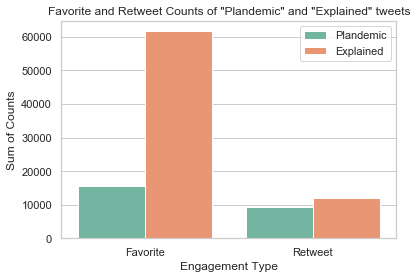

In [178]:
# Create dataframe to graph the retweets and favorites
fav_ret_df=pd.DataFrame({'tweet_type': ['Plandemic', 'Plandemic',
                                      'Explained', 'Explained'],
                         'engagement': ['Favorite', 'Retweet',
                                      'Favorite', 'Retweet'],
                         'count': [pl_favorite_count, pl_retweet_count,
                                   ex_favorite_count, ex_retweet_count]
                        })

# Graph results 
sns.set(style='whitegrid')
ax = sns.barplot(x='engagement', y = 'count', palette = 'Set2', hue = 'tweet_type', data = fav_ret_df)
#plt.xticks(rotation =90)
ax.set(xlabel = 'Engagement Type', ylabel = 'Sum of Counts', title = 'Favorite and Retweet Counts of "Plandemic" and "Explained" tweets')
ax.legend(title = False)

From these tweets, I collected all unique usernames. There are 8,740 "Plandemic" usernames and 9148 "Explained" usernames. From each of these lists, a random sample of 100 usernames was used for the analysis of friends for each group. 

In [180]:
# Get total count of unique usernames 
print(len(pl_username_list))
print(len(ex_username_list))

8740
9148


I obtained the number of friends for each list and calculated the mean number of friends for each group. The "Plandemic" tweeters follow a total of 81,282 Twitter users (M = 864.70) and the "Explained" tweeters follow 64,079 Twitter accounts (M = 653.87).

In [191]:
# Find the mean number of friends for each group 
pl_mean = len(pl_flat_list_friends)/len(a)
ex_mean = len(ex_flat_list_friends)/len(b)

print('"Plandemic" friends:' , len(pl_flat_list_friends), 'Mean:', pl_mean)
print('"Explained" friends:' ,len(ex_flat_list_friends), 'Mean:', ex_mean)


"Plandemic" friends: 81282 Mean: 864.7021276595744
"Explained" friends: 64079 Mean: 653.8673469387755


[Text(0, 0.5, 'Number of Friends'),
 Text(0.5, 1.0, 'Average number of Friends')]

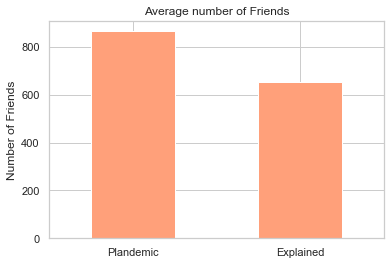

In [208]:
# Create dataframe to graph mean friend count
mean_friends_df = pd.DataFrame({'Mean # Friends': [pl_mean, ex_mean]},
                                index = ['Plandemic', 'Explained'])

# Graph results 
sns. set(style = 'whitegrid')
ay = mean_friends_df.plot.bar(color='lightsalmon', legend=False)
plt.xticks(rotation = 0)
ay.set(ylabel= 'Number of Friends', title = 'Average number of Friends')

Interestingly, "Plandemic" tweeters, on average, have more friends than "Explained" tweeters; however, "Plandemic" tweeters follow more of the same people than the "Explained" tweeters.

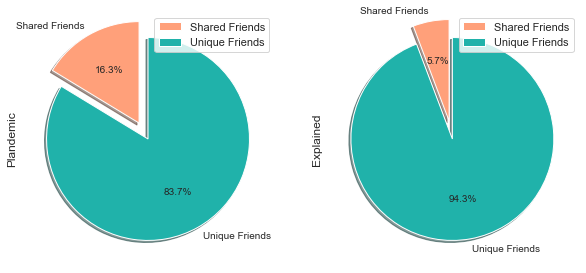

In [230]:
# Identify percentage of friends that are followed by more than one "Plandemic" tweeter
pl_common_friends = len(pl_flat_list_friends)-len(pl_counted_friends)
pl_percent_common = pl_common_friends/len(pl_flat_list_friends)*100
pl_percent_unique = 100-pl_percent_common

# Identify percentage of friends that are followed by more than one "Explained" tweeter 
ex_common_friends = len(ex_flat_list_friends)-len(ex_counted_friends)
ex_percent_common = ex_common_friends/len(ex_flat_list_friends)*100
ex_percent_unique = 100-ex_percent_common

# Create the data frame of shared friends
shared_perc_df = pd.DataFrame({'Plandemic': [pl_percent_common, pl_percent_unique],
                               'Explained': [ex_percent_common, ex_percent_unique]},
                              index = ['Shared Friends', 'Unique Friends'])

# Graph the results 
fig, ax = shared_perc_df.plot.pie(subplots=True,  autopct = '%1.1f%%', 
                              explode = [.18,0], figsize=(10,15), shadow =True, startangle = 90,
                               textprops={'fontsize': 10}, colors = ['lightsalmon','lightseagreen'])

My first research question asked which Twitter accounts are most followed by "Plandemic" tweeters. Among the top 10 most followed accounts for the "Plandemic" tweeters are Donald Trump, Donald Trump Jr., Tucker Carlson, and Ivanka Trump.

In [219]:
# Show top ten "Plandemic" tweeters' friends
pl_df['Username'][:10]

0    realDonaldTrump
1              POTUS
2        seanhannity
3             FLOTUS
4        IvankaTrump
5         WhiteHouse
6     DonaldJTrumpJr
7      TuckerCarlson
8      JudicialWatch
9     RealJamesWoods
Name: Username, dtype: object

Between the "Plandemic" and "Explained" tweeters, the friends lists look much different. 

In [220]:
# Set top 10 friends for "Plandemic" and "Explained" tweeters 
top_10_combined_df = combined_df[:20]

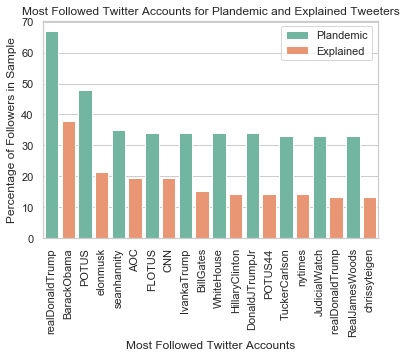

In [224]:
# Graph results 
sns. set(style = 'whitegrid')
ax = sns.barplot(x ='Username', y = 'percentage_followed', palette = 'Set2', hue = 'tweet_type', dodge = False, data = top_10_combined_df)
plt.xticks(rotation =90)
ax.set(xlabel = 'Most Followed Twitter Accounts', ylabel = 'Percentage of Followers in Sample', title = 'Most Followed Twitter Accounts for Plandemic and Explained Tweeters')
ax.legend(title = False)

Donald Trump is followed by almost 70% of the sample, when in comparison, the most frequent friend of the "Explained" tweeters, Barack Obama, is only followed by 37% of the sample. Across all friends, the "Plandemic" tweeters, follow the same accounts at a higher rate than those of the "Explained" sample. 

My second research questions asked what the breadth of accounts look like for the "Plandemic" tweeters. 

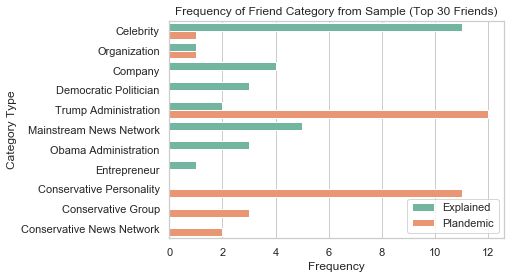

In [227]:
# Sort data alphabetically by tweet_type 
combined_df = combined_df.sort_values('tweet_type')

# Graph results 
sns.set(style='whitegrid')
ax = sns.countplot(y='category', hue='tweet_type', 
                   palette='Set2',
                   data=combined_df)
plt.xticks(rotation=0)
ax.set(ylabel='Category Type', xlabel='Frequency',
      title='Frequency of Friend Category from Sample (Top 30 Friends)')
ax.legend(title=False, loc='lower right')

I manually coded the Twitter accounts of the top 30 friends for each group. I used a Google search to determine how each account described itself. The resulting categories are: 
- Celebrity: someone famous for acting, singing (Ex. Ariana Grande, Ellen Degeneres)
- Organization: a public group, not structured for capital impact (Ex. NASA, WikiLeaks)
- Company: an organization with a goal to make profit (Ex. YouTube, Twitter)
- Democratic politician: member of the Democratic party, not in Obama administration (Ex: Hillary Clinton, Bernie Sanders)
- Trump Administration: member of Trump adminstration or Trump family member (Ivanka Trump, Mike Pompeo)
- Mainstram News Network: national or global newsource (Ex. CNN, BBC)
- Obama Adminstration: member of Obama adminstration or Obama family member (Ex. Barack Obama, Michelle Obama)
- Entrepreneur: founder of a company (Ex. Bill Gates, Elon Musk)
- Conservative personality: self-described conservative news host or author (Ex. Tucker Carlson, Sean Hannity)
- Conservative group: self-described conservative group (Ex. Team Trump, Judicial Watch)
- Conservative News Network: self-described conservative news network (Ex. OANN, Britbart News)

In [245]:
# Show categories for users in each Tweet Type 
combined_df[['Username', 'tweet_type', 'category', ]].sort_values('tweet_type')

,Username,tweet_type,category
14,ArianaGrande,Explained,Celebrity
2,AOC,Explained,Democratic Politician
3,CNN,Explained,Mainstream News Network
7,nytimes,Explained,Mainstream News Network
1,elonmusk,Explained,Celebrity
5,HillaryClinton,Explained,Democratic Politician
8,realDonaldTrump,Explained,Trump Administration
9,chrissyteigen,Explained,Celebrity
0,BarackObama,Explained,Obama Administration
4,BillGates,Explained,Entrepreneur


These results suggest that the "Plandemic" tweeters have less breadth in the type of friends they followed. "Plandemic" tweeters' friends could be grouped into six categories in contrast to "Explained" tweeters who could be grouped into eight categories. Further, of the five categories followed in the "Plandemic" group, four could be categorized as "Conservative": Trump administration, Conservative personality, Conservative group, and Conservative News Network. This suggests that the individuals who tweeted "Plandemic" are more likely to follow conservative Twitter accounts. Further, this might suggest that conservative Twitter accounts are more likely to spread and share misinformaiton about COVID-19. 

## Discussion

The primary conclusion we can draw from this study is that individuals who shared the "Plandemic" documentary were more likely to follow Twitter accounts that promote conservative messaging. Among the top 10 most followed accounts for "Plandemic" tweeters, all can be linked to conservative groups or the Trump administration. This may be cause for concern because it may mean that "Plandemic" tweeters are being exposed to messaging that promotes harmful messages about COVID-19. "Explained" tweeters were much more likely to follow celebrity accounts and had a wider range of categories they followed. This may suggest that "Explained" tweeters are consuming media from many different sources. 

### Limitations
The sample size of this project was smaller than I would have hoped. *But, to be honest, I actually retrieved 500 friends lists but accidentally wrote over the file and the top 10 list matched across seven of the usernames, so I think the results might have been representative of the population.* If I were to run this study again, I think 350 friends list would help with the power and representativeness of this study. 

Additionally, I am worried that the control group was not a control. I think this study could be stronger if compared to a population of general Twitter users. This may add another element to the study and provide a broader control group from which to compare. 

Finally, I did not exclude "Plandemic" tweeters from the Netflix "Explained" tweeters list. There is a chance there was overlap, and I will need to go back and make sure there are no shared usernames in the list. 


### Conclusion

Overall, this study is a reminder that the media we consume can influence our attitudes and beliefs. In this example, a conspiracy theory was more likely to be shared by individuals who mostly follow conservative accounts. Be careful about what you share and think about where your information is coming from. 

## References

Bryant, J., & Miron, D. (2004). Theory and research in mass communication. Journal of Communication, 54(4), 662–704. https://doi.org/10.1111/j.1460-2466.2004.tb02650.x

Enserink, M., & Cohen, J. (2020, May 8). Fact-checking Judy Mikovits, the controversial virologist attacking Anthony Fauci in a viral conspiracy video. Science. https://www.sciencemag.org/news/2020/05/fact-checking-judy-mikovits-controversial-virologist-attacking-anthony-fauci-viral

Frenkel, S., & Alba, D. (2020, May 20). How the ‘Plandemic’ Movie and Its Falsehoods Spread Widely Online. The New York Times. https://www.nytimes.com/2020/05/20/technology/plandemic-movie-youtube-facebook-coronavirus.html

Funke, D. (2020, May 11). PolitiFact: Fact-checking ‘Plandemic,’ a documentary full of false conspiracy theories on the coronavirus. Tampa Bay Times.

Gerbner, G., & Gross, L. (1976). Living With Television: The Violence Profile. Journal of Communication, 26(2), 172–194. https://doi.org/10.1111/j.1460-2466.1976.tb01397.x
